<a href="https://colab.research.google.com/github/CarolinaRomoG/Master-IA/blob/main/Copia_de_Copia_de_Copia_de_MIA_TFM2_CRG_FINAL_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo de fin de Módulo 2 MIA

* Trabajo realizado por: CRG/Carolina Romo González





# **Bloque 1** EXPLORACIÓN INICIAL DE LOS DATOS

## 1. Realiza una exploración del conjunto de datos utilizando métodos de la librería Pandas para cargar, filtrar y listar tablas de datos.

In [ ]:
# Importamos las librerías para exploración de datos
import pandas as pd
import numpy as np  # Lo importe de una vez porque pandas usa numpy internamente en operaciones como df.mean()

# Url para lectura de datos de un archivo en Github

data_file_url = "https://raw.githubusercontent.com/txusser/Master_IA_Sanidad/main/Modulo_2/datos/framingham.csv"

# Volcar los datos a un dataframe
df = pd.read_csv(data_file_url)

# Mostrar las primeras filas
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Descripción general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
# Métodos de estadística descriptiva

# Métricas descriptivas generales
print("\nResumen estadístico:")
print(df.describe(include='all'))

# Conteo de valores nulos
print("\nValores faltantes:")
print(df.isnull().sum())


Resumen estadístico:
              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.

Observo que en el conjunto de datos del estudio de Framingham hay dos tipos de variables:

Numericas continuas: Ege, Education, CigasPer day, totcho,SYSBP,diaBP,BMI heart Rate, glucose

Categoricas binarias: Male, currentSmoker, BPMeds, prevalent Stroke, PrevalentHyp, diabetes, TenyearCHD

Por otro lado, hay valores faltantes en 6 variables  principalmente se encuentra en la variable glucosa seguido de educación


## 2.Prepara una o más funciones que permitan realizar una exploración visual de los datos más relevantes utilizando las librerías python de tu elección.

In [ ]:
# Visualización de datos relevantes
import matplotlib.pyplot as plt  # importo para graficar
import seaborn as sns  # importo para visualización estadística más avanzada

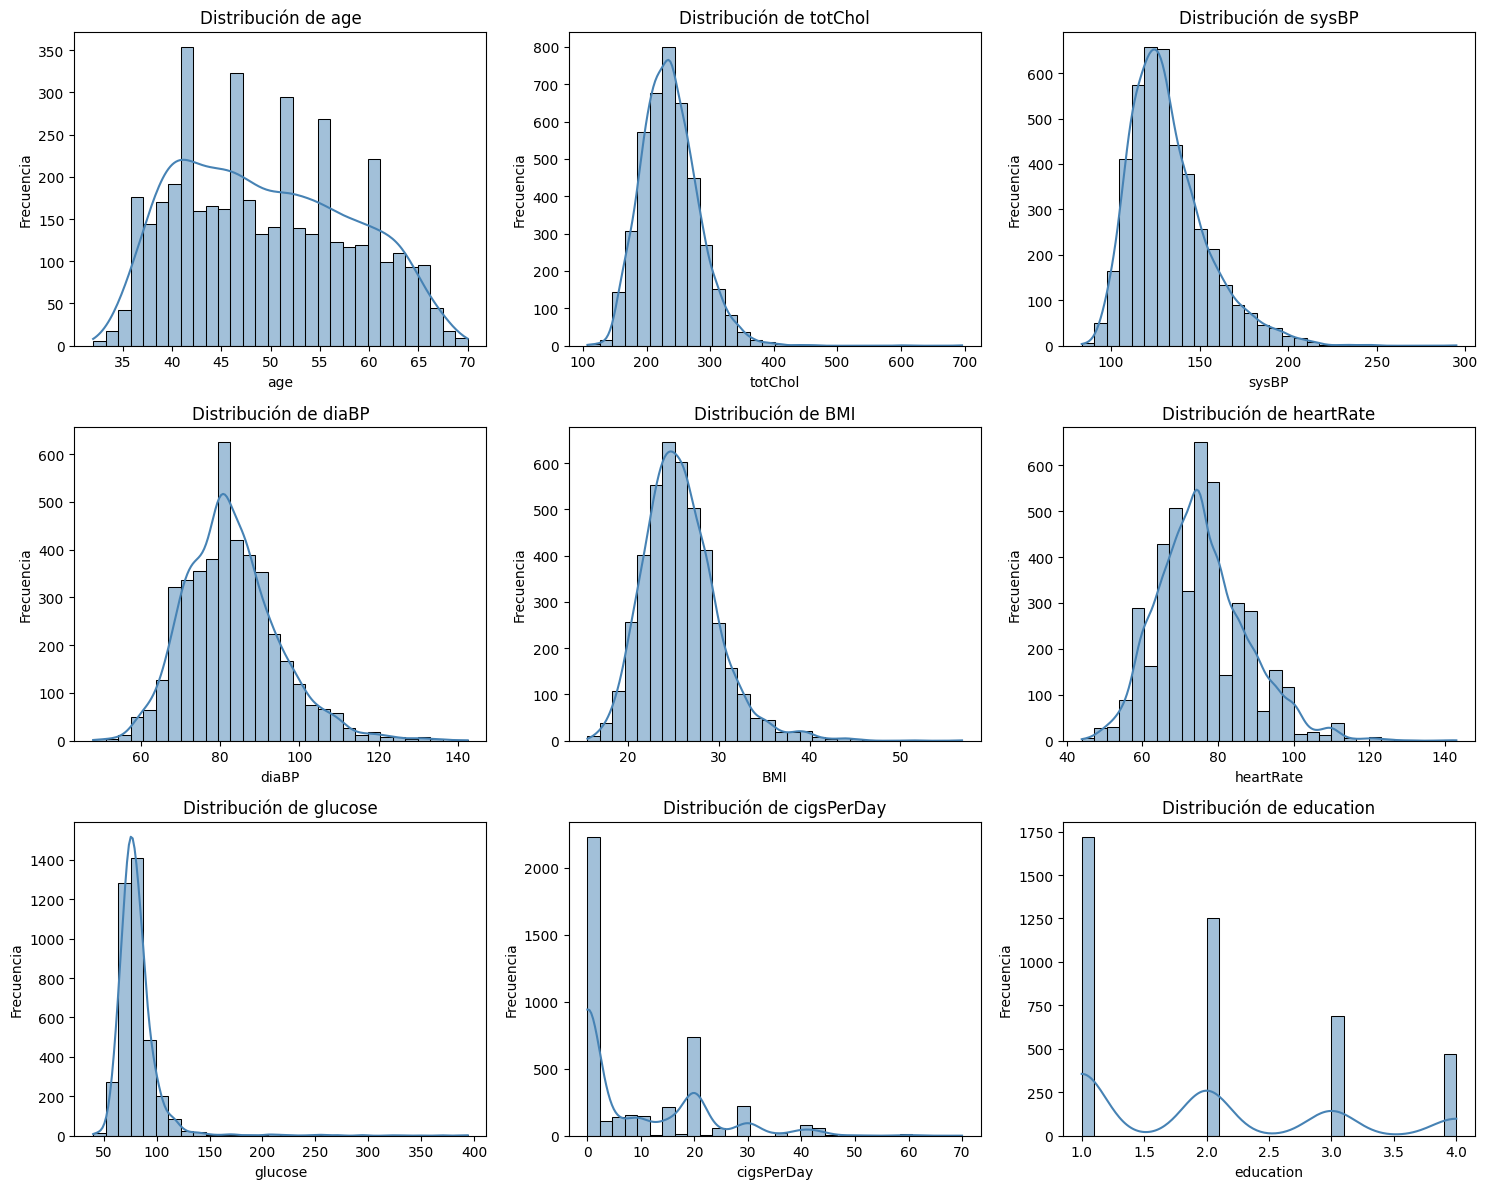

In [ ]:
# Distribución de variables numéricas continuas
numerical_cols = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay', 'education']

plt.figure(figsize=(15, 12))
for idx, col in enumerate(numerical_cols):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Las Variables edad, heartRate, glucose, cigsPerDay y education no muestran una adecuada distribución normal. En el caso de gluose y education y cigsPerDay la falta de datos puede generar esta distribución. Se puede observar por ejemplo variables con , sesgadas (glucose, totchol) o aparentemente distrubución normal (age).Estas observaciones nos dan una idea si se requerira métodos de imputación más adecuados.

<ipython-input-10-24a103a2814d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-10-24a103a2814d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-10-24a103a2814d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-10-24a103a2814d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


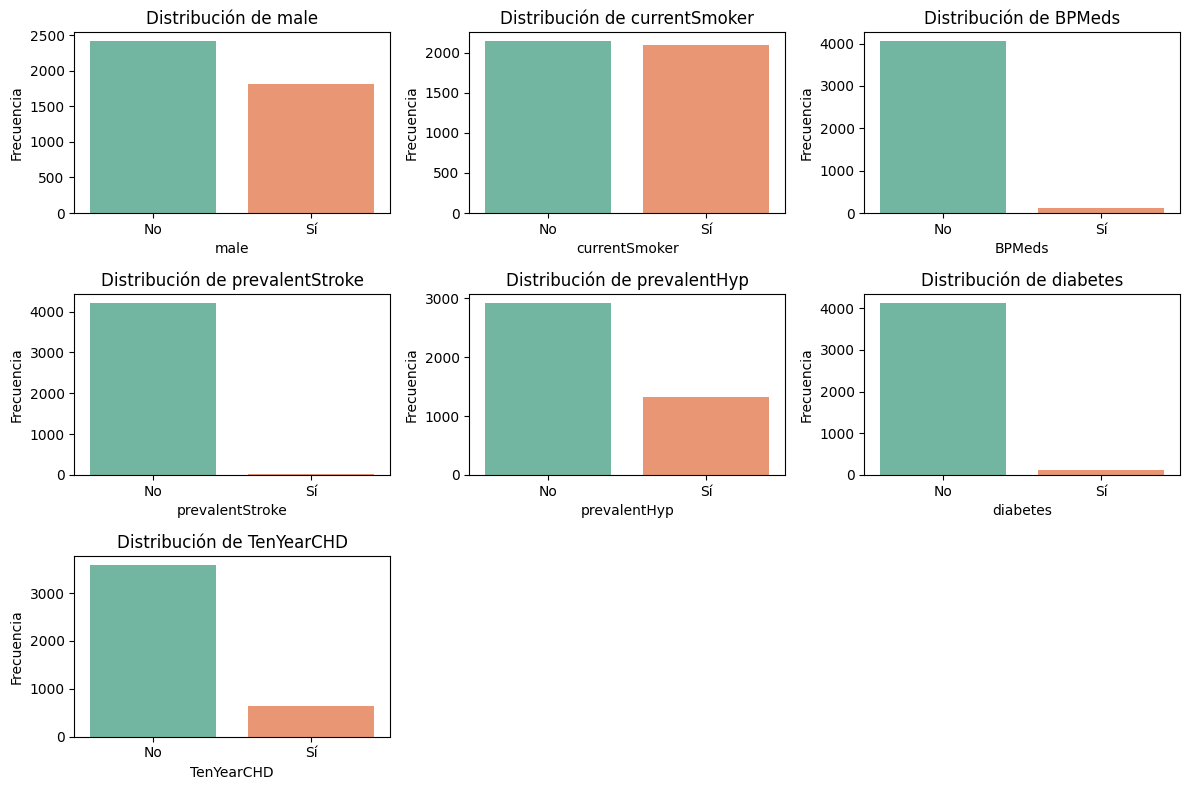

In [ ]:
# Distribución de variables dicotómicas
binary_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke',
               'prevalentHyp', 'diabetes', 'TenYearCHD']

plt.figure(figsize=(12, 8))
for idx, col in enumerate(binary_cols):
    plt.subplot(3, 3, idx + 1)
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks([0, 1], ['No', 'Sí'])
plt.tight_layout()
plt.show()

Represento este gráfico para las variables dicotomicas (binarias). Por ejemplo, se observa una baja proporción de pacientes con accidente cerebrovascular previo y diabetes, así como un desbalance importante en la variable objetivo 'TenYearCHD', donde la mayoría de los pacientes no desarrollaron enfermedad cardiovascular en 10 años.  Considero es importante este desbalance por que impactaría al modelo predictivo, esto se debe considerar en las etapas posteriores de este análisis.


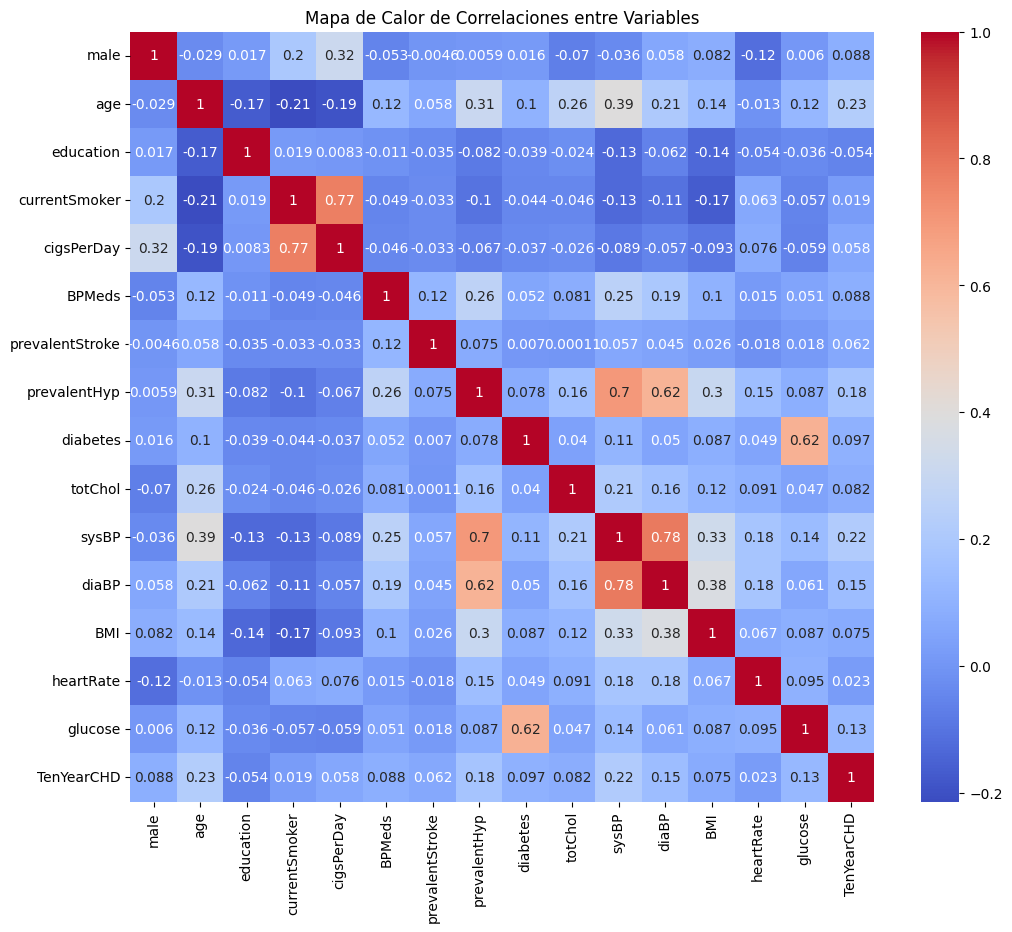

In [ ]:
# Mapa de calor de correlaciones entre variables
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones entre Variables")
plt.show()

Realice un mapa de calor porque permite ver todas las correlaciones entre variables de forma global y rápida.
En el mapa de calor, observo que nuestra variable objetivo  'TenYearCHD' nmuestra correlaciones positivas, aunque moderadas, con variables como 'age' (edad), 'sysBP' (presión sistólica) y 'prevalentHyp' (hipertensión). Estas correlaciones no son extremadamente altas, pero sí clínicamente relevantes: a mayor edad y presión, mayor probabilidad de desarrollar enfermedad cardiovascular, lo cual concuerda con evidencia del estudio Framingham  (paper proporcionado DOI:10.1157/13116658). Observo que, aunque las correlaciones no son numéricamente altas, sí son clínicamente relevantes Asimismo, la hipertensión previa es un claro factor de riesgo. La baja magnitud de estas correlaciones numéricas podria deberse a que los factores de riesgo no actúan de forma aislada, sino conjunta.





## Conclusiones - Bloque 1

### El conjunto de datos incluye 4240 pacientes y 16 variables clínicas y sociodemográficas.Hay un desbalance en la variable objetivo (TenYearCHD), lo cual puede afectar el modelo predictivo. Algunas variables presentan valores nulos que deberán imputarse. Visualmente, variables como edad, presión arterial y glucosa muestran posible relación con CHD, lo que justificaría su uso en etapas posteriores.



# **Bloque 2** PREPARACIÓN Y SELECCIÓN DE VARIABLES

## 3. Si lo estimas necesario, ejecuta métodos de imputación y normalización de datos explicando explicando brevemente tus decisiones.

In [ ]:
# Imputación y normalización
# Imputación de valores nulos con la media
# numpy se usa implícitamente: df.mean()
df = df.fillna(df.mean(numeric_only=True))

use el método media por simplicidad y por ser técnica rápida cuando la cantidad de nulos no es muy alta


In [ ]:
# Normalización
from sklearn.preprocessing import MinMaxScaler  # para los datos numéricos
scaler = MinMaxScaler()
cols_to_normalize = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay', 'education']
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


En este análisis se trabajó con variables tanto numéricas como categóricas binarias. Las variables categóricas (como sexo, hipertensión, diabetes) ya se encontraban codificadas en formato 0/1, lo cual es se usan directamente en modelos como regresión logística. Por ello, no se requirió codificación adicional. En cambio, las variables numéricas se normalizaron mediante MinMaxScaler para asegurar una escala homogénea.

## 4. Realiza un análisis básico de selección de características siguiendo alguna de las técnicas vistas a lo largo del módulo que te permita obtener una submuestra depurada del dataset original.


In [ ]:
# Selección de características
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("Características seleccionadas:", selected_features)


Características seleccionadas: ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']


## Comentarios - Bloque 2
Se eligió SelectKBest con prueba ANOVA (f_classif) porque permite seleccionar las variables más correlacionadas con la variable objetivo binaria de forma directa,(en este caso, si una persona va a tener una enfermedad cardiovascular o no en 10 años) es decir, “estas son las variables que más influyen en ese resultado”. Esta elección facilita la interpretación clínica de las variables seleccionadas (como presión sistólica, edad, IMC, glucosa y colesterol), lo cual es importante para decisiones en medicina. A diferencia de Análisis de Componentes Principales (PCA) crea nuevas variables mezclando las que ya teníamos, de acuerdo a lo que busque para decidir cual.

## 5. Partiendo de esta submuestra final, genera los grupos de entrenamiento y validación e imprime pos pantalla alguna características del mismo.


In [ ]:
# 5. División del dataset en entrenamiento y validación
from sklearn.model_selection import train_test_split
X_final = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)

# **Bloque 3** ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

## 6. Partiendo de esta submuestra final, genera los grupos de entrenamiento y validación e imprime pos pantalla alguna características del mismo.

In [ ]:
# 6. Entrenamiento del modelo: Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 7. Calcula y muestra por pantalla información (métricas) sobre el desempeño del modelo frente al conjunto de validación.

In [ ]:
# 7. Evaluación del modelo
predictions = model.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, predictions))

print("\nReporte de Clasificación:")
print(classification_report(y_test, predictions))

Matriz de Confusión:
[[1070    9]
 [ 184    9]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1079
           1       0.50      0.05      0.09       193

    accuracy                           0.85      1272
   macro avg       0.68      0.52      0.50      1272
weighted avg       0.80      0.85      0.79      1272



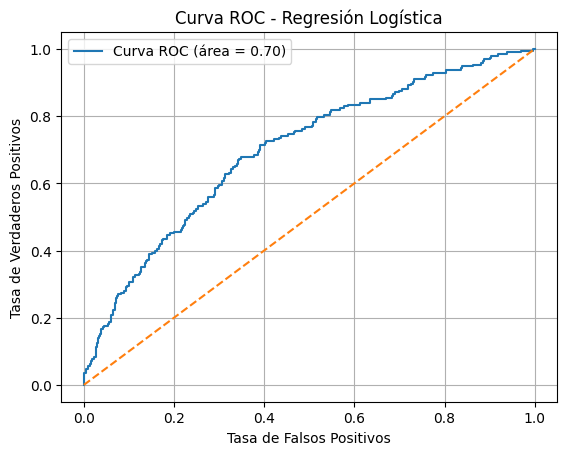

In [ ]:
# Curva ROC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid()
plt.show()

Las métricas de desempeño del modelo que se calcularon fue
Matriz de Confusión (Muestra el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos). Investigue estos conceptos para entender mejor Precisión (Precision) proporción de las predicciones positivas fueron correctas; Sensibilidad o Recall, proporción de casos positivos reales fueron correctamente identificados. El F1-score: Un promedio que equilibra precisión y sensibilidad asi como el Soporte (Support): Número de casos reales de cada clase. La curva ROC representa visualmente la capacidad del modelo para diferenciar entre pacientes con y sin riesgo. Cuanto más cercano a 1, mejor el desempeño. En este caso como hubo desbalance de clases y se trataron de corregir estas metricas nos permiten ver si el modelo predice bien tanto los casos con enfermedad cardiovascular (positivos) como los sin ella (negativos).

## Comentarios - Bloque 3

Para este análisis considere evaluar otros modelo , incluyendo árboles de decisión. Sin embargo, despues de buscar tambien información al respecto eleji regresión logística porque ofrece una buena combinación de simplicidad e interpretabilidad para problemas de clasificación binaria de acuerdo a lo que investigue y puede adaptar fácilmente para cuando hay muchos más pacientes sin CHD que con CHD, como en este caso que es un contexto clínico donde entender el impacto de cada variable es importante. La curva ROC mostró un Area bajo la curva razonable y el modelo logró distinguir entre pacientes en riesgo y sin riesgo con una precisión clínica adecuada.

# Conclusión Final
# Se logró construir un modelo predictivo interpretando correctamente el riesgo de enfermedad cardiovascular a 10 años. A través de una preparación de pasos que revisamos en el modulo 2.

## 8. Compartir Cuaderno de trabajo:
https://colab.research.google.com/drive/1oNtE_f2mgRFTcBU9YGA50IBNf0FXu1Cv?usp=sharing
